# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [65]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import tweepy as tp
import requests as rq
import tweepy

In [66]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [67]:
df_wrg = pd.read_csv('twitter-archive-enhanced.csv')
df_wrg.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [68]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = rq.get(url)
resp.content
with open ('image_predictions.tsv', mode ='wb') as file:
    file.write(resp.content)

In [69]:
img_pred = pd.read_csv(r'image_predictions.tsv', sep = '\t')
img_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [70]:
df_add = pd.read_json('tweet-json.txt', lines = True)
df_add.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [71]:
# 3 dataframes.df_wrg,img_pred, df_add
df_wrg.head()
df_wrg[df_wrg.doggo != "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None


In [72]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
df_add.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [74]:
df_wrg.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Quality issues
1.rating_denominator values are not consistent 

2.`names` are inaccurately extracted

3.`timestamp` should be of datetime type not string

4.some tweets are retweets from `df_add` and `df_wrg`. remove them

5.some of the columns have alot of null values retweeted_status,in_reply_to_status_id,in_reply_to_status_id_str...

6.`id` and `id_str` in `df_wrg` are duplicate columns and are not always equal.

7.rename the columns in `df_add` and `img_pred` to resemble the ones in `df_wrg`

8.remove the `favorited`,`retweeted`,`possibly_sensitive`,`possibly_sensitive_appealable`,`lang` columns as they are not helpful in analysis

### Tidiness issues
1.`df_wrg` has three variables `doggo`,`floofer`, `pupper`,`puppo` that refer to one variable. Use pandas melt to achieve this

2.The 3 tables should be in one 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [75]:
# Make copies of original pieces of data
df_01 = df_wrg.copy()
df_img = img_pred.copy()
df_03 = df_add.copy()

In [76]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #1:

#### Define: rating_denominator values should all be equal to 10

#### Code

In [77]:
#set all values to 10
df_wrg.rating_denominator = 10

#### Test

In [78]:
#check if the values are updated.
df_wrg.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #2:

#### Define
   `name` values extracted are inaccurate


#### Code

In [79]:
ind_1 = df_wrg[df_wrg.text.str.contains('This is')].index.values
ind_2 = df_wrg[df_wrg.text.str.contains('Meet')].index.values
#type(df_2.text)
def nameGen(df,pref,pos):
    names = []
    dfx = df[df.text.str.contains(pref)].text
    for p in dfx:
        name = p.split(' ')[pos]
        names.append(name)
    return names
names_this = nameGen(df_wrg, 'This is', 2)
names_meet = nameGen(df_wrg, 'Meet', 1)
names_meet
df_wrg.loc[3,'text']

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

In [80]:
#use the obtained names to fill in the name column
def append_name(df,i,names):
    i = i.tolist()
    j = 0
    for x in i:
        df.loc[x,'name'] = names[j]
        j = j+1
        
append_name(df_wrg,ind_2,names_meet)
append_name(df_wrg, ind_1,names_this)
df_wrg.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas.,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly.,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie.,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla.,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin.,None,None,None,None


In [81]:
df_wrg.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas.,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly.,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie.,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla.,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin.,None,None,None,None


In [82]:
def remName(df,st):
    df.name.replace(st,'',inplace = True)
remName(df_wrg,'a')
remName(df_wrg,'my')
remName(df_wrg,'just')


In [83]:
df_wrg[df_wrg.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Test

In [84]:
df_wrg[df_wrg.name == 'my' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [85]:
df_wrg.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas.,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly.,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie.,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla.,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin.,None,None,None,None


## Issue 3

### Define: `timestamp` should be of datetime type not string

### Code

In [86]:
df_wrg['timestamp'] = pd.to_datetime(df_wrg['timestamp'])

In [87]:
#filter the tweets from after 1st of August 2017
df_wrg = df_wrg[df_wrg.timestamp <= "2017-08-01"]

## Test

In [88]:
#check if date is of the intented type
df_wrg['timestamp'].dtype

datetime64[ns, UTC]

In [89]:
#confirm that the tweets remaining are after August 1st 2017
df_wrg.timestamp.min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

### Issue 4

### Define: 
Remove all tweets that are retweets from `df_add` and `df_wrg`

### Code

In [90]:
#only pick the tweets that are not retweets
df_add = df_add[df_add.retweeted_status.isnull()]

df_wrg = df_wrg[~ df_wrg.text.str.contains('RT @')]


In [91]:
df_wrg.in_reply_to_status_id.notnull().value_counts()

False    2095
True       78
Name: in_reply_to_status_id, dtype: int64

### Test

In [92]:
#check if any tweets still start with RT@
#expect empty df
df_wrg[df_wrg.text.str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [93]:
#expect empty df
df_add[df_add.retweeted_status.notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


### Issue 5

### Define
Drop the columns that have alot of null values `retweeted_status`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`     in_reply_to_screen_name`, `geo,coordinates`, `place`, `contributors`,`retweeted_status`,`quoted_status_id_str`,`quoted_status_id`,`quoted_status`    

### Code

In [94]:
def colDrop(df,data):
    df.drop(data, axis = 1, inplace = True)

col_data = ['retweeted_status','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates', 'place', 'contributors','retweeted_status','quoted_status_id_str','quoted_status_id','quoted_status']
col_null = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
            'retweeted_status_timestamp']
colDrop(df_add,col_data)
colDrop(df_wrg, col_null)


### Test

In [95]:
#check for any remaining columns with null values
df_add.info()
df_add.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   user                           2175 non-null   object             
 10  is_quote_status         

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,0.0,0.0,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,0.0,0.0,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,0.0,0.0,en


In [96]:
df_wrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   source              2173 non-null   object             
 3   text                2173 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2173 non-null   int64              
 6   rating_denominator  2173 non-null   int64              
 7   name                2173 non-null   object             
 8   doggo               2173 non-null   object             
 9   floofer             2173 non-null   object             
 10  pupper              2173 non-null   object             
 11  puppo               2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

# Issue 6

### Define
`id` and `id_str` in `df_wrg` should are duplicate columns and are not always equal.

### Code

In [97]:
#confirm for records with mismatch in id values
df_add[df_add.id != df_add.id_str]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,2158,12041,False,False,0.0,0.0,en
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,7711,32467,False,False,0.0,0.0,en
11,2017-07-25 16:11:53+00:00,889880896479866881,889880896479866880,This is Bruno. He is a service shark. Only get...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 889880888800096258, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,5156,28268,False,False,0.0,0.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,2015-11-16 00:49:46+00:00,666055525042405380,666055525042405376,Here is a Siberian heavily armored polar bear ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,261,448,False,False,0.0,0.0,en
2348,2015-11-16 00:30:50+00:00,666050758794694657,666050758794694656,This is a truly beautiful English Wilson Staff...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,60,136,False,False,0.0,0.0,en
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,0.0,0.0,en
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,128,False,False,0.0,0.0,en


In [98]:
colDrop(df_add,['id_str'])

### Test

In [99]:
#ascertain that the str_id col has been dropped
df_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   full_text                      2175 non-null   object             
 3   truncated                      2175 non-null   bool               
 4   display_text_range             2175 non-null   object             
 5   entities                       2175 non-null   object             
 6   extended_entities              1994 non-null   object             
 7   source                         2175 non-null   object             
 8   user                           2175 non-null   object             
 9   is_quote_status                2175 non-null   bool               
 10  retweet_count           

In [100]:
df_wrg[df_wrg.name != 'None'] 
df_wrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   source              2173 non-null   object             
 3   text                2173 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2173 non-null   int64              
 6   rating_denominator  2173 non-null   int64              
 7   name                2173 non-null   object             
 8   doggo               2173 non-null   object             
 9   floofer             2173 non-null   object             
 10  pupper              2173 non-null   object             
 11  puppo               2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue 7

### Define: 
rename the columns in `df_add` and `img_pred` to resemble the ones in `df_wrg`

### Code

In [101]:
#rename the relevant columns in df_add
df_add.rename(columns = {'id':'tweet_id', 'created_at':'timestamp',
                              'full_text':'text'}, inplace = True)

In [102]:
df_add.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [103]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   timestamp                      2175 non-null   datetime64[ns, UTC]
 1   tweet_id                       2175 non-null   int64              
 2   text                           2175 non-null   object             
 3   truncated                      2175 non-null   bool               
 4   display_text_range             2175 non-null   object             
 5   entities                       2175 non-null   object             
 6   extended_entities              1994 non-null   object             
 7   source                         2175 non-null   object             
 8   user                           2175 non-null   object             
 9   is_quote_status                2175 non-null   bool               
 10  retweet_count           

### Issue 8

### Define:
remove the `favorited`,	`retweeted`,`possibly_sensitive`,`possibly_sensitive_appealable`,`lang` columns as they are not helpful in analysis

### Code

In [104]:
data = ['favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang']
colDrop(df_add,data)

### Test

In [105]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2175 non-null   datetime64[ns, UTC]
 1   tweet_id            2175 non-null   int64              
 2   text                2175 non-null   object             
 3   truncated           2175 non-null   bool               
 4   display_text_range  2175 non-null   object             
 5   entities            2175 non-null   object             
 6   extended_entities   1994 non-null   object             
 7   source              2175 non-null   object             
 8   user                2175 non-null   object             
 9   is_quote_status     2175 non-null   bool               
 10  retweet_count       2175 non-null   int64              
 11  favorite_count      2175 non-null   int64              
dtypes: bool(2), datetime64[ns, UTC](1)

## Tidiness
### Issue 1 

### Define 
`df_wrg` has three variables `doggo`,`floofer`, `pupper`,`puppo` that refer to one variable. Use pandas melt to achieve this

### Code

In [106]:
df_wrg = pd.melt(df_wrg, id_vars = ['tweet_id','timestamp','source','text','expanded_urls','rating_numerator', 'rating_denominator' ,'name'],
                 var_name = 'dog',value_name = 'dog_stage')

In [107]:
df_wrg = df_wrg[df_wrg.dog_stage != "None"]
df_wrg.reset_index(drop = True, inplace = True)

In [108]:
#confirm that columns are duplicate
df_wrg[df_wrg.dog != df_wrg.dog_stage]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage


In [109]:
#drop one of the resulting duplicate columns.
colDrop(df_wrg,['dog'])

### Test

In [110]:
df_wrg.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie.,doggo
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi.,doggo
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean.,doggo
4,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo


### Issue 2

### Define:
The three datasets require to be joined for proper analysis

### Code

In [111]:
df_wrg.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie.,doggo
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi.,doggo
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean.,doggo
4,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo


In [112]:
df_add.head()

,timestamp,tweet_id,text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048


In [113]:
df_wrg.head()
df_add.head()
df_clean = pd.merge(df_wrg,df_add,
                   on = ['tweet_id','timestamp','text','source'],how = 'left')
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     325
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      2
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       2
Name: source, dtype: int64

In [114]:
df_clean = pd.merge(df_clean,img_pred,
                   on = ['tweet_id'])

In [115]:
#df_clean.info()
df_add.is_quote_status.value_counts()
display(df_add.text.sample())

840    This is Rufus. He just missed out on the 100m ...
Name: text, dtype: object

### Issue 9 (Quality)
#### Define: `source` variable needs to be reduced to only the relevant source information
### Code

In [116]:
df_clean['source'] = df_clean['source'].str.replace(r'<[^<>]*>', '', regex=True)

### Test

In [117]:
df_clean.source.value_counts()

Twitter for iPhone    314
TweetDeck               2
Twitter Web Client      1
Name: source, dtype: int64

### Issue 10 (Quality)
### Define 
remove values in `p1_dog` that correspond to False since they dont refer to dogs

### Code

In [118]:
df_clean = df_clean[df_clean.p1_dog == True]

### Test

In [119]:
#confirm the 
df_clean.p1.value_counts()

golden_retriever           36
Labrador_retriever         17
Pembroke                   13
Pomeranian                  9
pug                         8
                           ..
Irish_water_spaniel         1
black-and-tan_coonhound     1
vizsla                      1
borzoi                      1
Airedale                    1
Name: p1, Length: 75, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [120]:
df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [121]:
df_clean[df_clean.p1_dog == False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,truncated,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [122]:
df_clean.dog_stage.value_counts()

pupper     152
doggo       58
puppo       20
floofer      8
Name: dog_stage, dtype: int64

In [123]:
df_clean[df_clean.p1 == 'golden_retriever']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,truncated,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
5,858843525470990336,2017-05-01 00:40:27+00:00,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,False,...,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
10,846514051647705089,2017-03-28 00:07:32+00:00,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney.,doggo,False,...,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
22,826958653328592898,2017-02-02 01:01:21+00:00,Twitter for iPhone,This is Loki. He smiles like Elvis. Ain't noth...,https://twitter.com/dog_rates/status/826958653...,12,10,Loki.,doggo,False,...,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
26,821765923262631936,2017-01-18 17:07:18+00:00,Twitter for iPhone,This is Duchess. She uses dark doggo forces to...,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess.,doggo,False,...,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
38,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,False,...,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
39,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,pupper,False,...,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
47,795464331001561088,2016-11-07 03:14:10+00:00,Twitter for iPhone,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,False,...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
48,786363235746385920,2016-10-13 00:29:39+00:00,Twitter for iPhone,This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo.,doggo,False,...,1,golden_retriever,0.929266,True,Labrador_retriever,0.062867,True,Saluki,0.002157,True
51,782747134529531904,2016-10-03 01:00:34+00:00,Twitter for iPhone,This is Deacon. He's the happiest almost dry d...,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon.,doggo,False,...,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
58,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,False,...,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True


In [124]:
df_clean.name.value_counts()

None       91
            7
Cooper.     3
Oliver.     2
Loki.       2
           ..
Rover.      1
Sierra.     1
Jed.        1
Ginger.     1
Bayley.     1
Name: name, Length: 131, dtype: int64

In [131]:
#median rating
df_clean.rating_numerator.median()

11.5

In [126]:
#get highest rated dog
df_clean[df_clean.rating_numerator == df_clean.rating_numerator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,truncated,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
122,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie.,pupper,False,...,1,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


### Insights:
1.The most popular dog_stage posted was `pupper` with `floofer` being the least popular

2.The most popular dog name is Cooper

3.The highest rated dog is Sophie with a 27 (All the dogs are equally good boys/girls however!)

### Visualization

In [127]:
dog_stages = df_clean.dog_stage.value_counts()

Text(0.5, 1.0, 'Count of dog stages in the dataset')

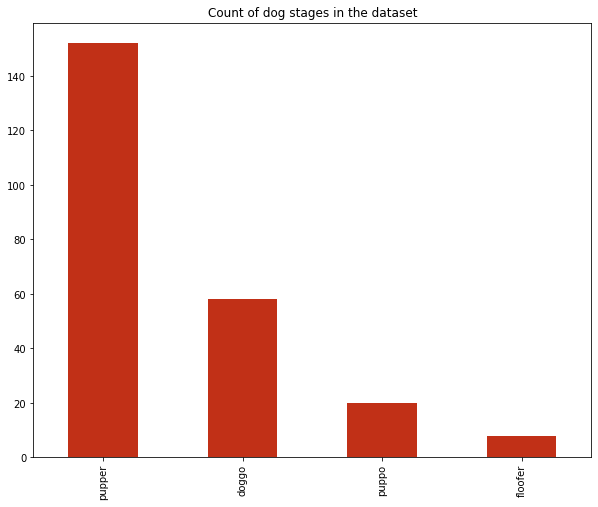

In [128]:
plt.figure(figsize = (10,8))
dog_stages.plot(kind = 'bar', color = '#C13017')
plt.title('Count of dog stages in the dataset')